In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Imposta il seed per la riproducibilità dei dati casuali
np.random.seed(0)

# ========================================
# PREPARAZIONE DEI DATI
# ========================================

# --- Dataset per scatter plot avanzato ---
# Crea un DataFrame con 100 punti per il grafico scatter avanzato
df_scatter = pd.DataFrame(
    {
        "x": np.linspace(0, 10, 100),  # Valori x equispaziati da 0 a 10
        "y": np.sin(np.linspace(0, 10, 100))
        + np.random.normal(0, 0.3, 100),  # Funzione seno con rumore gaussiano
        "z": np.random.rand(100),  # Valori casuali per colorare i punti
        "dim": np.random.rand(100) * 10,  # Dimensioni casuali per i punti (0-10)
    }
)

# --- Dataset per grafici nei subplots ---
# DataFrame per grafico a barre con 4 categorie
df_bar = pd.DataFrame({"categoria": ["A", "B", "C", "D"], "valori": [23, 45, 56, 12]})

# DataFrame per scatter plot semplice con valori casuali
df_scatter2 = pd.DataFrame({"a": np.random.rand(100), "b": np.random.rand(100)})

# DataFrame per istogramma con distribuzione normale
df_hist = pd.DataFrame({"dati": np.random.randn(100)})

# --- Dataset per personalizzazione avanzata ---
# DataFrame con dati temporali di temperatura
df_temp = pd.DataFrame(
    {
        "tempo": np.arange(0, 20, 1),  # Tempo da 0 a 19 ore
        "temperatura": np.random.normal(20, 3, 20),
    }  # Temperature con media 20°C e deviazione 3°C
)

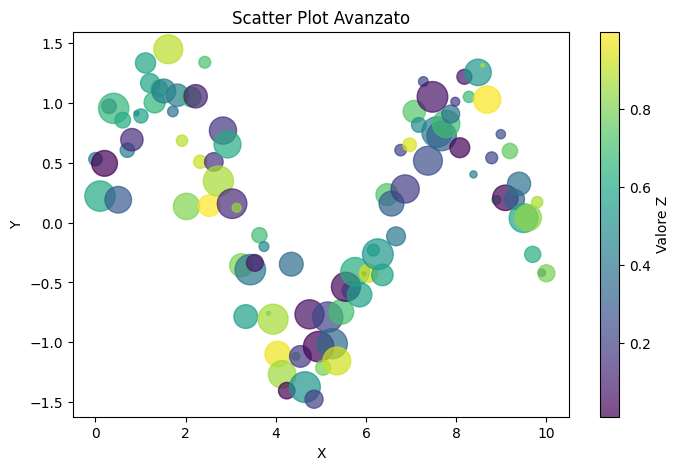

In [4]:
# ========================================
# 1. SCATTER PLOT AVANZATO
# ========================================
# Crea una figura con dimensioni specifiche
plt.figure(figsize=(8, 5))

# Crea scatter plot con caratteristiche avanzate
scatter = plt.scatter(
    df_scatter["x"],  # Coordinate x
    df_scatter["y"],  # Coordinate y
    c=df_scatter["z"],  # Colore basato sui valori z
    s=df_scatter["dim"] * 50,  # Dimensioni punti proporzionali a 'dim'
    alpha=0.7,  # Trasparenza dei punti (70% opaco)
    cmap="viridis",  # Mappa colori viridis
)

# Aggiunge barra colorimetrica per interpretare i colori
plt.colorbar(scatter, label="Valore Z")

# Aggiunge titoli e etichette agli assi
plt.title("Scatter Plot Avanzato")
plt.xlabel("X")
plt.ylabel("Y")

# Mostra il grafico
plt.show()

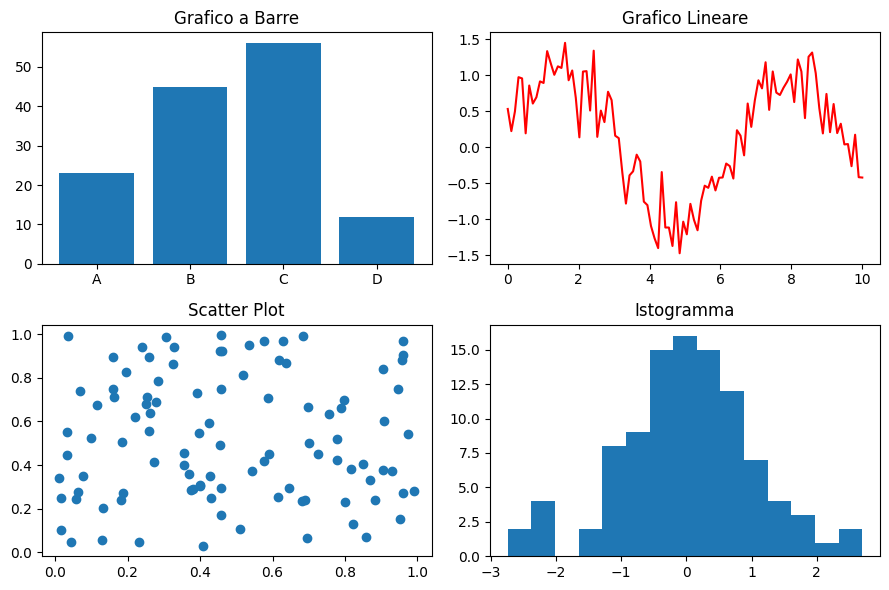

In [7]:
# ========================================
# 2. SUBPLOTS - MULTIPLI GRAFICI
# ========================================
# Crea una griglia 2x2 di subplots
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Subplot 1: Grafico a barre (posizione [0,0] - in alto a sinistra)
axs[0, 0].bar(df_bar["categoria"], df_bar["valori"])
axs[0, 0].set_title("Grafico a Barre")

# Subplot 2: Grafico lineare (posizione [0,1] - in alto a destra)
axs[0, 1].plot(df_scatter["x"], df_scatter["y"], "r-")  # Linea rossa continua
axs[0, 1].set_title("Grafico Lineare")

# Subplot 3: Scatter plot semplice (posizione [1,0] - in basso a sinistra)
axs[1, 0].scatter(df_scatter2["a"], df_scatter2["b"])
axs[1, 0].set_title("Scatter Plot")

# Subplot 4: Istogramma (posizione [1,1] - in basso a destra)
axs[1, 1].hist(df_hist["dati"], bins=15)  # 15 bin per l'istogramma
axs[1, 1].set_title("Istogramma")

# Ottimizza la disposizione dei subplots per evitare sovrapposizioni
plt.tight_layout()
plt.show()

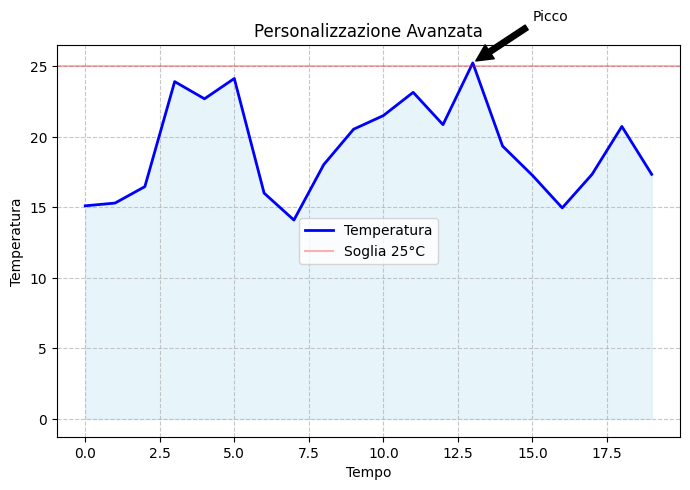

In [10]:
# ========================================
# 3. PERSONALIZZAZIONE AVANZATA
# ========================================
# Crea figura per grafico con personalizzazioni avanzate
plt.figure(figsize=(7, 5))

# Grafico lineare principale con stile personalizzato
plt.plot(
    df_temp["tempo"],
    df_temp["temperatura"],
    "b-",  # Linea blu continua
    linewidth=2,  # Spessore linea
    label="Temperatura",  # Etichetta per la legenda
)

# -------- ANNOTAZIONE DEL PICCO --------
# Trova l'indice del valore massimo di temperatura
idx_picco = df_temp["temperatura"].idxmax()
tempo_picco = df_temp["tempo"][idx_picco]  # Tempo corrispondente al picco
temp_picco = df_temp["temperatura"][idx_picco]  # Valore temperatura del picco

# Aggiunge annotazione con freccia al punto di massima temperatura
plt.annotate(
    "Picco",  # Testo dell'annotazione
    xy=(tempo_picco, temp_picco),  # Punto da annotare (coordinate del picco)
    xytext=(tempo_picco + 2, temp_picco + 3),  # Posizione del testo (spostato)
    arrowprops=dict(facecolor="black", shrink=0.05),  # Proprietà della freccia
)

# -------- ELEMENTI GRAFICI AGGIUNTIVI --------
# Aggiunge griglia con linee tratteggiate e trasparenza
plt.grid(True, linestyle="--", alpha=0.7)

# Linea orizzontale di riferimento a 25°C
plt.axhline(y=25, color="r", linestyle="-", alpha=0.3, label="Soglia 25°C")

# Area riempita sotto la curva per evidenziare i dati
plt.fill_between(df_temp["tempo"], df_temp["temperatura"], alpha=0.2, color="skyblue")

# -------- FINALIZZAZIONE GRAFICO --------
plt.title("Personalizzazione Avanzata")
plt.xlabel("Tempo")
plt.ylabel("Temperatura")
plt.legend()  # Mostra la legenda con le etichette
plt.tight_layout()  # Ottimizza la disposizione del grafico
plt.show()